In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("seaborn-whitegrid")

In [3]:
import glob

In [4]:
FILES = glob.glob("*.csv")

In [5]:
FILES

['ag_news_30K.csv',
 'imdb.csv',
 'rotten_tomatoes.csv',
 'sst2.csv',
 'trec.csv',
 'hate_speech_18.csv',
 'hate_speech_bin_18.csv',
 'trip_advisor_hotel_rev.csv',
 'trip_advisor_hotel_rev_bin.csv']

In [6]:
sdf = []
for f in FILES:
    sdf.append(pd.read_csv(f))

In [7]:
df = pd.concat(sdf)

In [8]:
df.head()

,acc_scores,f1_scores,fold_number,dataset_name,classes,dataset_len,percent_labeled_samples,exec_time_secs_9_runs
0,0.822000,0.819441,0,AG_News_30K_Train,4,30000,0.1,3812.445608
1,0.829167,0.827159,1,AG_News_30K_Train,4,30000,0.1,3812.445608
2,0.827833,0.825643,2,AG_News_30K_Train,4,30000,0.1,3812.445608
3,0.832500,0.830556,3,AG_News_30K_Train,4,30000,0.1,3812.445608
4,0.832500,0.831183,4,AG_News_30K_Train,4,30000,0.1,3812.445608


In [9]:
df.to_csv("paper_results.csv", index=False)

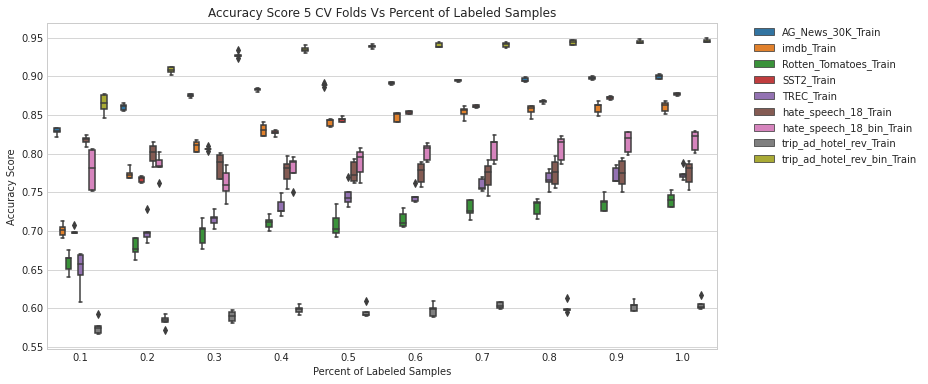

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="percent_labeled_samples", y="acc_scores", hue="dataset_name")
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0)
plt.xlabel("Percent of Labeled Samples")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score 5 CV Folds Vs Percent of Labeled Samples")
plt.show()

In [11]:
mean_acc_values = df.groupby(["dataset_name", "percent_labeled_samples"])["acc_scores"].mean().reset_index()

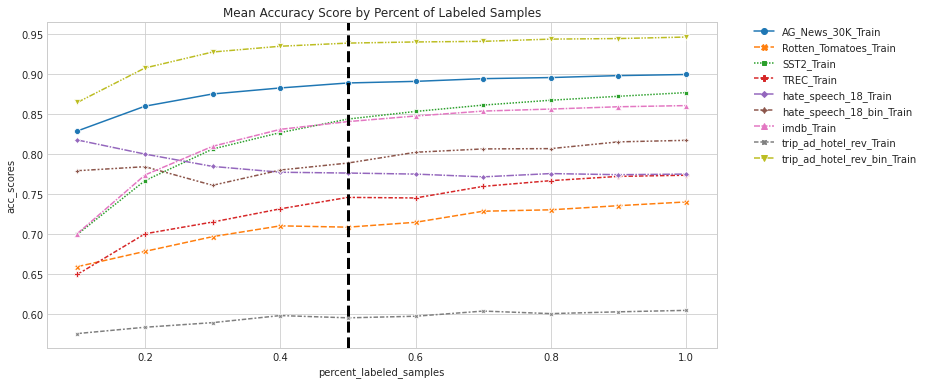

In [12]:
plt.figure(figsize=(12,6))
sns.lineplot(data=mean_acc_values, x="percent_labeled_samples", y="acc_scores", hue="dataset_name", markers=True, style="dataset_name")
plt.axvline(x=0.5, ls="--", lw=3, color="black")
plt.title("Mean Accuracy Score by Percent of Labeled Samples")
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0)

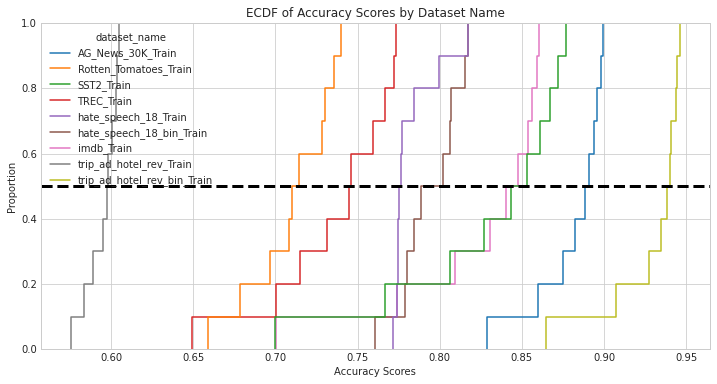

In [13]:
plt.figure(figsize=(12,6))
sns.ecdfplot(data=mean_acc_values, x="acc_scores", hue="dataset_name")
plt.axhline(y=0.5, ls="--", lw=3, color="black")
plt.title("ECDF of Accuracy Scores by Dataset Name")
plt.xlabel("Accuracy Scores")
plt.show()

___

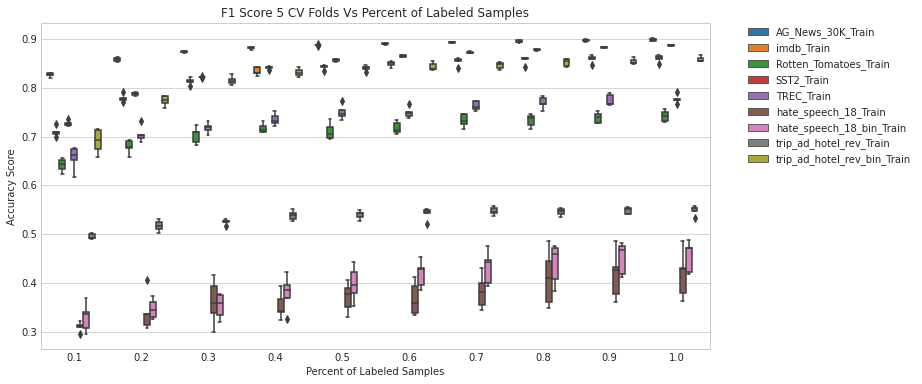

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="percent_labeled_samples", y="f1_scores", hue="dataset_name")
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0)
plt.xlabel("Percent of Labeled Samples")
plt.ylabel("Accuracy Score")
plt.title("F1 Score 5 CV Folds Vs Percent of Labeled Samples")
plt.show()

In [15]:
mean_f1_values = df.groupby(["dataset_name", "percent_labeled_samples"])["f1_scores"].mean().reset_index()

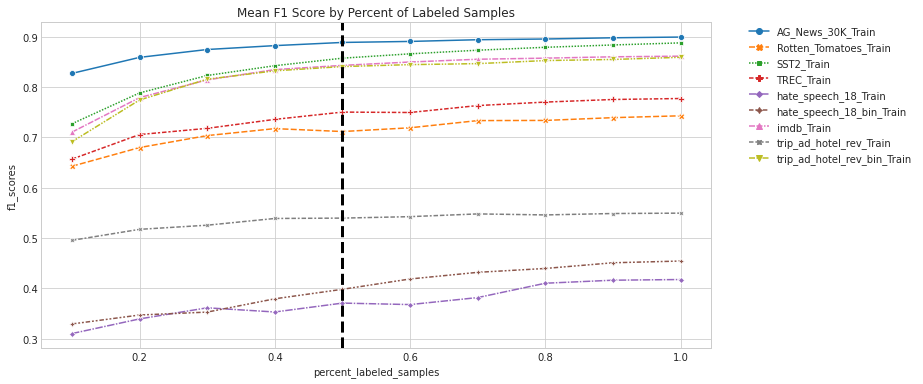

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(data=mean_f1_values, x="percent_labeled_samples", y="f1_scores", hue="dataset_name", markers=True, style="dataset_name")
plt.axvline(x=0.5, ls="--", lw=3, color="black")
plt.title("Mean F1 Score by Percent of Labeled Samples")
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0)

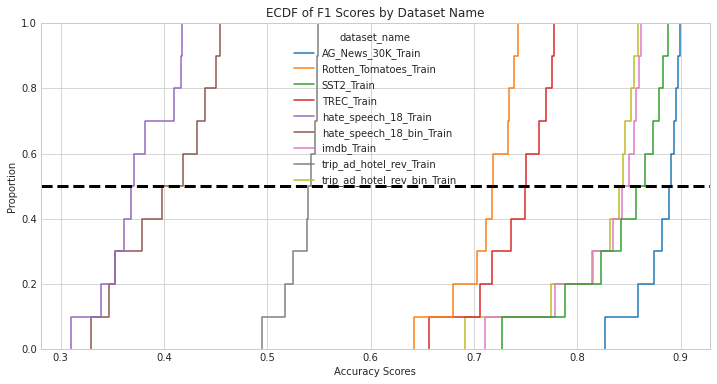

In [17]:
plt.figure(figsize=(12,6))
sns.ecdfplot(data=mean_f1_values, x="f1_scores", hue="dataset_name")
plt.axhline(y=0.5, ls="--", lw=3, color="black")
plt.title("ECDF of F1 Scores by Dataset Name")
plt.xlabel("Accuracy Scores")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0)
plt.show()